# TZ Gaming: Optimal Targeting of Mobile Ads

In [163]:
import os

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pyrsm as rsm
import seaborn as sns

# increase plot resolution
# mpl.rcParams["figure.dpi"] = 200

In [164]:
# if your pyrsm version is not 1.1.0 install in a
# terminal using: pip install --user pyrsm --upgrade
rsm.__version__

'1.1.0'

In [165]:
# loading data tz_gaming.parquet
tz_gaming = pd.read_parquet("data/tz_gaming.parquet")
tz_gaming.head()

,training,inum,click,time,time_fct,app,mobile_os,impup,clup,ctrup,...,ctrua,imput,clut,ctrut,imppat,clpat,ctrpat,rnd,pred_vneta,id
0,train,I7,no,9,9,app8,ios,439,2,0.455581,...,0.000000,25,0,0.000000,71,1,1.408451,-1.207066,0.003961,id247135
1,train,I23,no,15,15,app1,ios,64,0,0.000000,...,0.000000,7,0,0.000000,67312,1069,1.588127,0.277429,0.003961,id245079
2,train,I28,no,12,12,app5,ios,80,0,0.000000,...,6.578947,94,0,0.000000,331,1,0.302115,1.084441,0.003961,id927245
3,train,I30,no,19,19,app1,ios,25,0,0.000000,...,0.000000,19,0,0.000000,71114,1001,1.407599,-2.345698,0.018965,id922188
4,train,I35,no,24,24,app1,android,3834,29,0.756390,...,0.689655,329,4,1.215805,183852,2317,1.260253,0.429125,0.003961,id355833


In [166]:
tz_gaming_description = rsm.md("data/tz_gaming_description.md")

### TZ Gaming: Optimal Targeting of Mobile Ads

Each row in the `tz_gaming` dataset represents an impression. For each row (impression), we have data on 21 variables. All explanatory variables are created by Vneta based on one month tracking history of users, apps, and ads. The available variables are described in below. 

* _training_ -- Dummy variable that splits the dataset into a training ("train") and a test ("test") set
* _inum_ -- Impression number
* _click_ -- Click indicator for the TZ ad served in the impression. Equals "yes" if the ad was clicked and "no" otherwise
* _time_ -- The hour of the day in which the impression occurred (1-24). For example, "2" indicates the impression occurred between 1 am and 2 am
* _time\_fct_ -- Same as _time_ but the is coded as categorical 
* _app_ -- The app in which the impression was shown. Ranges from 1 to 49
* _mobile\_os_ -- Customer's mobile OS
* _impup_ -- Number of past impressions the user has seen in the app
* _clup_ -- Number of past impressions the user has clicked on in the app
* _ctrup_ -- Past CTR (Click-Through Rate) (x 100) for the user in the app
* _impua_ -- Number of past impressions of the TZ ad that the user has seen across all apps
* _clua_ -- Number of past impressions of the TZ ad that the user has clicked on across all apps
* _ctrua_ -- Past CTR (x 100) of the TZ ad by the user across all apps
* _imput_ -- Number of past impressions the user has seen within in the hour
* _clut_ -- Number of past impressions the user has clicked on in the hour
* _ctrut_ -- Past CTR (x 100) of the user in the hour
* _imppat_ -- Number of past impressions that showed the TZ ad in the app in the hour
* _clpat_ -- Number of past clicks the TZ ad has received in the app in the hour
* _ctrpat_ -- Past CTR (x 100) of the TZ ad in the app in the hour
* _rnd_ -- Simulated data from a normal distribution with mean 0 and a standard deviation of 1
* _pred\_vneta_ -- Predicted probability of click per impressions generated by Vneta's proprietary machine learning algorithm
* id -- Anonymized user ID

Note that there is a clear relationship between the impressions, clicks, and ctr variables within a strata. Specifically: 

* ctrup = clup/impup
* ctru = clu/impu
* ctrut = clut/imput
* ctrpat = clpat/impat

The last three letters of a feature indicate the sources of variation in a variable:

* u — denotes user
* t — denotes time
* p — denotes app
* a — denotes ad 



> Note: Review the data description carefully and watch the "Video: TZ gaming preview (12 min)" linked on Canvas

> Note: Full case and question details are contained in the tz-gaming-msba.pdf file


## Part I: Logistic regression (10 points)

> Note: For the following questions, use only the "training" sample of impressions (i.e., 87,535 rows where "training == 'train'").

a. Estimate a logistic regression model using `click` as the response variable (target) and the following as explanatory variables (features). The model should predict the probability that `click` is equal to "yes" (2 points):

`time_fct, app, mobile_os, impua, clua, ctrua`

In [167]:
tz_gaming_train = tz_gaming[tz_gaming['training'] == 'train']
tz_gaming_train.head()

,training,inum,click,time,time_fct,app,mobile_os,impup,clup,ctrup,...,ctrua,imput,clut,ctrut,imppat,clpat,ctrpat,rnd,pred_vneta,id
0,train,I7,no,9,9,app8,ios,439,2,0.455581,...,0.000000,25,0,0.000000,71,1,1.408451,-1.207066,0.003961,id247135
1,train,I23,no,15,15,app1,ios,64,0,0.000000,...,0.000000,7,0,0.000000,67312,1069,1.588127,0.277429,0.003961,id245079
2,train,I28,no,12,12,app5,ios,80,0,0.000000,...,6.578947,94,0,0.000000,331,1,0.302115,1.084441,0.003961,id927245
3,train,I30,no,19,19,app1,ios,25,0,0.000000,...,0.000000,19,0,0.000000,71114,1001,1.407599,-2.345698,0.018965,id922188
4,train,I35,no,24,24,app1,android,3834,29,0.756390,...,0.689655,329,4,1.215805,183852,2317,1.260253,0.429125,0.003961,id355833


In [168]:
clf = rsm.model.logistic({"tz_gaming_train": tz_gaming_train}, rvar="click", lev="yes", evar=["time_fct", "app", "mobile_os", "impua", "clua", "ctrua"])
clf.summary()

Logistic regression (GLM)
Data                 : tz_gaming_train
Response variable    : click
Level                : yes
Explanatory variables: time_fct, app, mobile_os, impua, clua, ctrua
Null hyp.: There is no effect of x on click
Alt. hyp.: There is an effect of x on click

                     OR      OR%  coefficient   std.error  z.value p.value     
Intercept         0.029   -97.1%        -3.53       0.197  -17.936  < .001  ***
time_fct[2]       0.622   -37.8%        -0.47       0.321   -1.478   0.139     
time_fct[3]       0.718   -28.2%        -0.33       0.454   -0.730   0.466     
time_fct[4]       0.000  -100.0%       -23.54   42007.161   -0.001     1.0     
time_fct[5]       0.000  -100.0%       -23.72   55229.970   -0.000     1.0     
time_fct[6]       0.349   -65.1%        -1.05       1.021   -1.030   0.303     
time_fct[7]       1.221    22.1%         0.20       0.426    0.468    0.64     
time_fct[8]       1.104    10.4%         0.10       0.296    0.335   0.737     
ti

In [169]:
clf.summary(main=False, fit=False, vif=True)


Variance inflation factors:

             vif    Rsq
clua       1.292  0.226
app        1.250  0.200
impua      1.239  0.193
ctrua      1.174  0.148
time_fct   1.051  0.048
mobile_os  1.002  0.002


Low VIFs indicate that multicollinearity is unlikely to cause instability in the coefficient estimates or inflate standard errors. Since all VIFs are well below the threshold (5 or 10), there is no immediate need to remove variables or apply techniques like regularization to address. The low multicollinearity ensures that the coefficients for predictors like clua, impua, and ctrua can be interpreted without the influence of redundant information from other predictors.


b. Summarize and interpret the logistic regression results. Which of these explanatory variables are statistically significant? Which variables are most important? Make sure your model evaluation includes (1) an interpretation of the Permutation importance and Prediction plots for the explanatory variables `mobile_os`, `impua`, `clua`, and `ctrua` and (2) an evaluation of the model as a whole using Pseudo R-squared and the Chi-square test (5 points).

This logistic regression model predicts the likelihood of a click (click == "yes") using explanatory variables: time_fct, app, mobile_os, impua, clua, and ctrua. Below is a detailed analysis of the model's output.

1. Pseudo R-squared:
McFadden’s Pseudo R-squared: 0.109
Indicates the model explains about 10.9% of the variance in the log-likelihood compared to a null model. It measures how well the model fits the data compared to a null model (a model with no predictors, only an intercept). For logistic regression, values between 0.2 and 0.4 are considered excellent, so 0.109 is moderate. While this value might appear low compared to linear regression, Pseudo R-squared values between 0.2 and 0.4 are considered excellent in logistic regression.

    The model captures a moderate proportion of variability in the log-likelihood. There is room for improvement, either by refining predictors or adding additional relevant features.

2. Adjusted Pseudo R-squared: 0.092
Adjusted for the number of predictors in the model, this value is slightly lower than the unadjusted metric. It accounts for the complexity of the model and penalizes overfitting.
Implications:

3. Chi-Square Test
The Chi-square test assesses whether the inclusion of predictors significantly improves the model’s fit compared to the null model. We can see a Chi-Square Value of 968.279 with Degrees of Freedom value 76 (number of predictors in the model, including levels of categorical variables) and P-value: p<0.001. A very low p-value indicates strong evidence that the predictors collectively improve the model's fit compared to the null model.

    The high Chi-square value, coupled with a significant p-value, confirms that the predictors used in the model meaningfully contribute to explaining the variability in the likelihood of a click. The model is statistically better than the null model, indicating the predictors are relevant and collectively improve the model fit.

4. Area Under the Curve (AUC): 0.792
Indicates strong discriminatory power. AUC values above 0.7 are considered good; 0.792 suggests the model performs well in distinguishing between clicks and non-clicks.

While the model is statistically significant, the relatively low Pseudo R-squared implies that other factors not included in the model may also play a significant role in predicting clicks

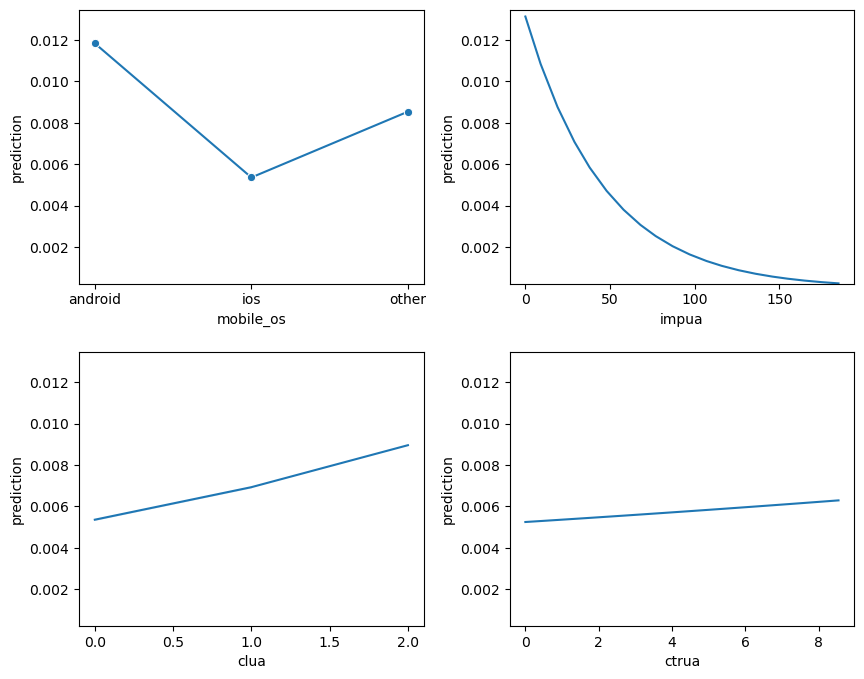

In [170]:
clf.plot("pred", incl = ["mobile_os", "impua", "clua", "ctrua"])

1. Mobile Operating System (mobile_os)

When looking at the prediction plot for mobile_os, it’s clear that the operating system plays a significant role in determining the likelihood of a click. Android users show the highest predicted probability of clicking on the ad, which suggests they’re more receptive to these impressions. On the other hand, iOS users have the lowest click probability, indicating they may be less engaged or respond differently to ads compared to Android users. Interestingly, users with "Other" operating systems fall somewhere in between, neither as responsive as Android users nor as resistant as iOS users.

This trend could stem from various factors, such as differences in app ecosystems, user behaviors, or even how ads are presented on different platforms. Android users might be more exposed to ads or more comfortable interacting with them, which could explain their higher engagement. Conversely, iOS users might have stricter privacy settings or be less likely to click on ads due to platform-specific features. These insights suggest that targeting Android users more aggressively could be an effective strategy.

2. Past Impressions of the TZ Ad Across All Apps (impua)

The plot for impua the number of past impressions a user has seen for the TZ ad across all apps—shows a clear and dramatic decline in click probability as impressions increase. When users see fewer impressions, their predicted probability of clicking is relatively high. However, as impressions increase, the likelihood of clicking decreases sharply and eventually flattens near zero. This pattern reflects what’s commonly known as "ad fatigue," where users become less engaged with ads they’ve seen too many times.

This insight is critical for designing ad campaigns. Repeated exposure to the same ad might annoy users or make them tune out entirely, leading to diminishing returns.

3. Past Clicks on the TZ Ad Across All Apps (clua)

The clua plot, which represents the number of past clicks on the TZ ad by the user, tells a very different story. As the number of past clicks increases, so does the predicted probability of clicking. This positive relationship highlights the importance of past behavior as a strong predictor of future engagement. Users who have clicked on the ad one or two times before are significantly more likely to click again compared to those who have never clicked.

It also suggests that focusing on users with a history of clicking ads could be a valuable strategy. This group appears to represent a reliable audience for generating clicks, making it essential to prioritize their engagement.

4. Past Click-Through Rate (CTR) of the TZ Ad Across All Apps (ctrua)

The plot for ctrua, which measures the past click-through rate of the TZ ad across all apps, shows a modest upward trend. As the CTR increases, the probability of clicking does increase slightly, but the effect is not as strong as it is for clua or impua. This suggests that while CTR is a positive predictor, its impact on click probability is relatively weak compared to other variables.

One possible explanation is that CTR reflects general user engagement but doesn’t capture more specific behaviors like direct clicks (clua). While it’s still a useful variable for understanding ad performance, it may not be as actionable on its own for targeting purposes. That said, combining CTR data with other predictors, like past clicks, could improve targeting efficiency and help identify users with high potential for engagement.



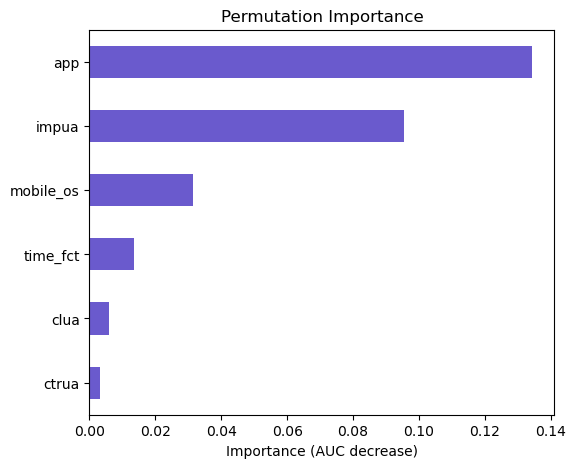

In [171]:
clf.plot("vimp", incl = ["mobile_os", "impua", "clua", "ctrua"])

1. App -
The app where the ad is shown is by far the most important factor in predicting clicks. When the app variable is permuted, it leads to the largest decrease in AUC, showing just how critical this feature is. It makes sense—different apps likely have different user demographics and engagement levels, which directly impact ad performance. To improve results, you could focus on optimizing ad placements in high-performing apps and even customize ad content for specific apps to match their audience.

2. Past Impressions of the TZ Ad (impua) -
The number of past impressions (impua) comes in as the second most important variable. As seen earlier, users exposed to fewer impressions are much more likely to click, while overexposure leads to ad fatigue. This strong effect on AUC highlights the importance of controlling ad frequency. Strategies like impression capping or targeting users with fewer past exposures could make a big difference in click-through rates.

3. Mobile Operating System (mobile_os) -
The operating system also plays a noticeable role in predicting clicks, although it’s not as impactful as app or impua. Android users are more likely to click compared to iOS users, making this a relevant feature for tailoring campaigns. For example, ads could be optimized specifically for Android users, or campaigns could allocate a larger budget toward Android-heavy platforms.

4. Time of Day (time_fct) -
The time of day when an impression is served has some influence on click probabilities, but it’s not a major driver of performance. Certain time slots may show higher engagement, but the overall effect is small. This suggests that while timing matters, it’s not as critical as the app or the number of impressions. Still, experimenting with ad delivery during specific hours could reveal valuable patterns.

5. Past Clicks on the TZ Ad (clua) -
The number of past clicks a user has made on TZ ads has a smaller impact on AUC. While it’s a good indicator of individual engagement (as seen in earlier plots), its contribution to the overall model performance is limited. This suggests that while past clicks are useful for targeting specific users, they’re less effective at driving the big-picture performance of the model.

6. Past CTR Across Apps (ctrua) -
Finally, past CTR has the least impact on model performance. Its effect on AUC is minimal, meaning it doesn’t add much predictive power compared to other features. This might indicate that CTR is too general to strongly influence click predictions on its own. While it can provide some context, it’s likely better used in combination with other, more impactful variables.

c. Predict the probability of a click (2 points)

The estimated logistic regression model can predict the probability of `click == "yes"`. Create a new variable `pred_logit` with the predicted click probabilities for each impression. Make sure to generate predictions for all rows in both the training and test data.

In [172]:
tz_gaming["pred_logit"] = clf.predict(data=tz_gaming)["prediction"]
tz_gaming["pred_logit"].head(-1)

0         3.382977e-13
1         1.156355e-02
2         2.655311e-03
3         1.349420e-02
4         1.868222e-03
              ...     
115482    1.132018e-02
115483    1.093091e-03
115484    3.609483e-03
115485    2.052670e-02
115486    2.192207e-02
Name: pred_logit, Length: 115487, dtype: float64

d. Estimate a logistic regression with `click` as the response variable and `rnd` as the **only** explanatory variable. As before, the model should be estimated on the training sample (i.e., "training == 'train'"). Create a new variable `pred_rnd` with the predicted click-through probabilities (1 point).

In [173]:
clf_rnd = rsm.model.logistic({"tz_gaming_train": tz_gaming_train}, rvar="click", lev="yes", evar=["rnd"])
tz_gaming["pred_rnd"] = clf_rnd.predict(data=tz_gaming)["prediction"]
tz_gaming["pred_rnd"].head()

0    0.009222
1    0.008751
2    0.008505
3    0.009600
4    0.008704
Name: pred_rnd, dtype: float64

## Part II: Understanding Multicollinearity and Omitted Variable Bias (10 points)

a. Estimate a logistic regression model with `click` as the response variable and `imppat`, `clpat`, and `ctrpat` as the only explanatory variables. What is the interpretation of the Prediction plots for the explanatory variables? (2 points)

> Note: Make sure to watch the "Video: TZ gaming preview (12 min)" on Canvas before answering this questions so you fully understand what the variables represent

In [174]:
clf_mc1 = rsm.model.logistic({"tz_gaming_train": tz_gaming_train}, rvar="click", lev="yes", evar=["imppat", "clpat", "ctrpat"])
clf_mc1.summary()

Logistic regression (GLM)
Data                 : tz_gaming_train
Response variable    : click
Level                : yes
Explanatory variables: imppat, clpat, ctrpat
Null hyp.: There is no effect of x on click
Alt. hyp.: There is an effect of x on click

              OR     OR%  coefficient  std.error  z.value p.value     
Intercept  0.004  -99.6%        -5.42      0.073  -74.156  < .001  ***
imppat     1.000   -0.0%        -0.00      0.000   -4.802  < .001  ***
clpat      1.002    0.2%         0.00      0.000    5.713  < .001  ***
ctrpat     1.615   61.5%         0.48      0.034   13.933  < .001  ***

Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Pseudo R-squared (McFadden): 0.035
Pseudo R-squared (McFadden adjusted): 0.035
Area under the RO Curve (AUC): 0.676
Log-likelihood: -4273.088, AIC: 8554.176, BIC: 8591.695
Chi-squared: 314.248, df(3), p.value < 0.001 
Nr obs: 87,535


In [175]:
clf_mc1.summary(main=False, fit=False, vif=True)


Variance inflation factors:

           vif    Rsq
clpat   26.242  0.962
imppat  23.467  0.957
ctrpat   1.668  0.400


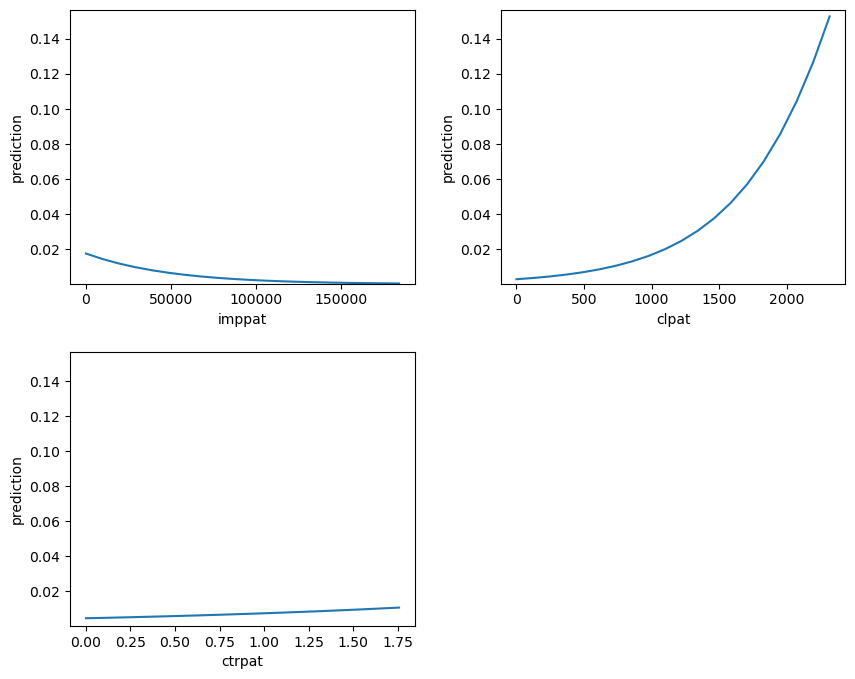

In [176]:
clf_mc1.plot("pred", incl = ["imppat", "clpat", "ctrpat"])

... discuss the results here ...


1. imppat (Number of Past Impressions of the TZ Ad in the App and Hour) -
The plot for imppat shows a sharp decline in the predicted probability of a click as the number of past impressions increases. Initially, when the imppat value is low, the predicted probability of a click is relatively higher, indicating that users are more likely to engage with ads they haven’t seen frequently. However, as imppat increases, the probability of a click quickly drops and eventually flattens out close to zero. This pattern reflects "ad fatigue," where users become less responsive to ads they see repeatedly within the same app and hour.

2. clpat (Number of Past Clicks on the TZ Ad in the App and Hour) -
The plot for clpat tells a very different story. Here, the predicted probability of a click increases exponentially as the number of past clicks rises. Users who have previously clicked on the TZ ad in the same app and hour are significantly more likely to click again. This strong positive relationship indicates that past behavior is a reliable predictor of future engagement.
This trend makes sense from a behavioral standpoint. Users who have already shown interest in the ad are likely finding the content relevant or appealing, making them more inclined to engage again.By identifying users with a history of clicking on ads, marketers can focus their efforts on audiences with a proven interest, maximizing the effectiveness of their campaigns.

3. ctrpat (Past Click-Through Rate of the TZ Ad in the App and Hour) - 
The plot for ctrpat shows a modest upward trend in the predicted probability of a click as the past click-through rate increases. While the relationship is not as dramatic as with clpat, it still indicates that higher CTRs in the app and hour are associated with a greater likelihood of a click. This suggests that the overall engagement level within a specific context—measured by CTR is important.

b. Some of the variables in the dataset are highly correlated with each other. In particular, `imppat` and `clpat` have a very high positive correlation of 0.97. Discuss the implications of this (very) high level of collinearity and also different approaches to deal with it. What are the implications for the model and the interpretation of the Prediction plots? As part of your answer, discuss the change in the Prediction plot for `imppat` when you remove `clpat` from the model you estimated for II.a (4 points).

> Note: Assign your new model without `clpat` to a new object `clf_mc2`. Calculate VIF statistics for each explanatory variable in the model

In [177]:
clf_mc2= rsm.model.logistic({"tz_gaming_train": tz_gaming_train}, rvar="click", lev="yes", evar=["imppat", "ctrpat"])
clf_mc2.summary()

Logistic regression (GLM)
Data                 : tz_gaming_train
Response variable    : click
Level                : yes
Explanatory variables: imppat, ctrpat
Null hyp.: There is no effect of x on click
Alt. hyp.: There is an effect of x on click

              OR     OR%  coefficient  std.error  z.value p.value     
Intercept  0.004  -99.6%        -5.53      0.068  -80.814  < .001  ***
imppat     1.000    0.0%         0.00      0.000    5.460  < .001  ***
ctrpat     1.733   73.3%         0.55      0.030   18.422  < .001  ***

Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Pseudo R-squared (McFadden): 0.031
Pseudo R-squared (McFadden adjusted): 0.031
Area under the RO Curve (AUC): 0.674
Log-likelihood: -4290.903, AIC: 8587.805, BIC: 8615.945
Chi-squared: 278.619, df(2), p.value < 0.001 
Nr obs: 87,535


In [178]:
clf_mc2.summary(main=False, fit=False, vif=True)


Variance inflation factors:

          vif    Rsq
imppat  1.134  0.118
ctrpat  1.134  0.118


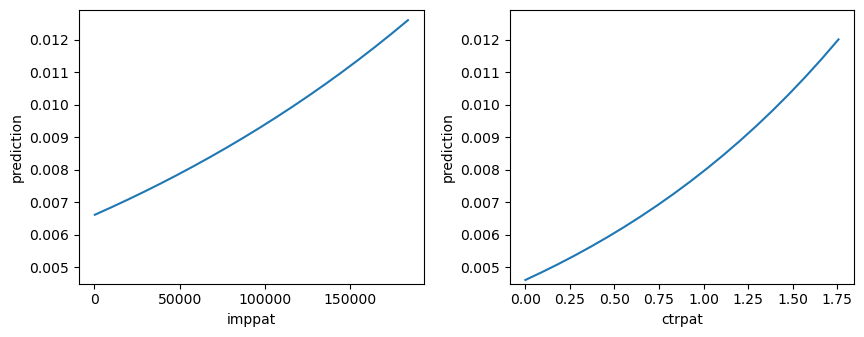

In [179]:
clf_mc2.plot("pred", incl = ["imppat", "ctrpat"])

### Implications of High Collinearity

The high Variance Inflation Factors (VIF) and strong correlation between imppat and clpat (0.97) indicate a severe multicollinearity issue. This happens when two or more explanatory variables are highly correlated, making it difficult for the model to distinguish their individual effects on the response variable (click). Here are the key implications:

1. Instability in Coefficient Estimates:

The coefficients for imppat and clpat may become unstable or highly sensitive to small changes in the data. This makes it hard to determine which variable is truly driving the predicted probabilities.

2. Reduced Interpretability: 

High collinearity means the model struggles to assign distinct effects to each variable, leading to challenges in interpreting their contribution.

3. Inflated Variance in Coefficients:

Multicollinearity inflates the standard errors of the coefficients, reducing the statistical significance of individual variables even when they may have a meaningful effect.

### Approaches to Address Multicollinearity

1. Remove One of the Highly Correlated Variables:

Dropping clpat or imppat from the model is the simplest approach. Since clpat represents a more direct measure of engagement (actual clicks), it may be more meaningful to retain clpat and remove imppat.
This simplifies the model, reduces collinearity, and enhances interpretability.

2. Combine Variables:

Create a composite variable that captures the shared information of both imppat and clpat, such as their sum or ratio.

### Effect of Removal

Before Removal: In the previous model with clpat, the prediction plot for imppat showed a decline in the probability of a click as imppat increased. This suggested a negative relationship between past impressions of the ad and user engagement, which aligned with the idea of "ad fatigue."

After Removal: Now, the prediction plot for imppat shows an increasing relationship, where the probability of a click grows steadily as the number of past impressions increases. Without clpat in the model, imppat is absorbing some of the predictive power that was previously shared with clpat. This suggests that the model is now treating imppat as a proxy for both impressions and clicks.

The model's interpretation of imppat has shifted significantly. Instead of indicating diminishing returns, imppat is now positively associated with click probability. This change demonstrates how high collinearity can distort the interpretation of variables, as the removal of one variable forces the model to reallocate its effects to the remaining correlated variables.

c. Estimate another logistic regression model with `click` as the response variable and `time_fct`, `app`, `imppat`, `clpat`, and `ctrpat` as the explanatory variable. Why are the Prediction plots for `imppat`, `clpat`, and `ctrpat` different compared to the plots from the model you estimated in II.a? Please be specific and investigate beyond simply stating the statistical problem (4 points).

> Note: You may want to test if a (set of) coefficients are equal to 0 (or Odds-ratios are equal to 1)

In [180]:
clf_mc3 = rsm.model.logistic({"tz_gaming_train": tz_gaming_train}, rvar="click", lev="yes", evar=["imppat", "clpat", "ctrpat", "app", "time_fct"])
clf_mc3.summary()

Logistic regression (GLM)
Data                 : tz_gaming_train
Response variable    : click
Level                : yes
Explanatory variables: imppat, clpat, ctrpat, app, time_fct
Null hyp.: There is no effect of x on click
Alt. hyp.: There is an effect of x on click

                 OR      OR%  coefficient   std.error  z.value p.value     
Intercept     0.012   -98.8%        -4.42       0.284  -15.575  < .001  ***
app[app2]     0.136   -86.4%        -2.00       0.351   -5.681  < .001  ***
app[app3]     0.187   -81.3%        -1.67       1.016   -1.649   0.099    .
app[app4]     0.487   -51.3%        -0.72       0.359   -2.004   0.045    *
app[app5]     0.413   -58.7%        -0.88       1.011   -0.874   0.382     
app[app6]     1.007     0.7%         0.01       0.216    0.034   0.973     
app[app7]     0.708   -29.2%        -0.35       1.019   -0.340   0.734     
app[app8]     0.000  -100.0%       -24.11   72717.594   -0.000     1.0     
app[app9]     0.935    -6.5%        -0.07     

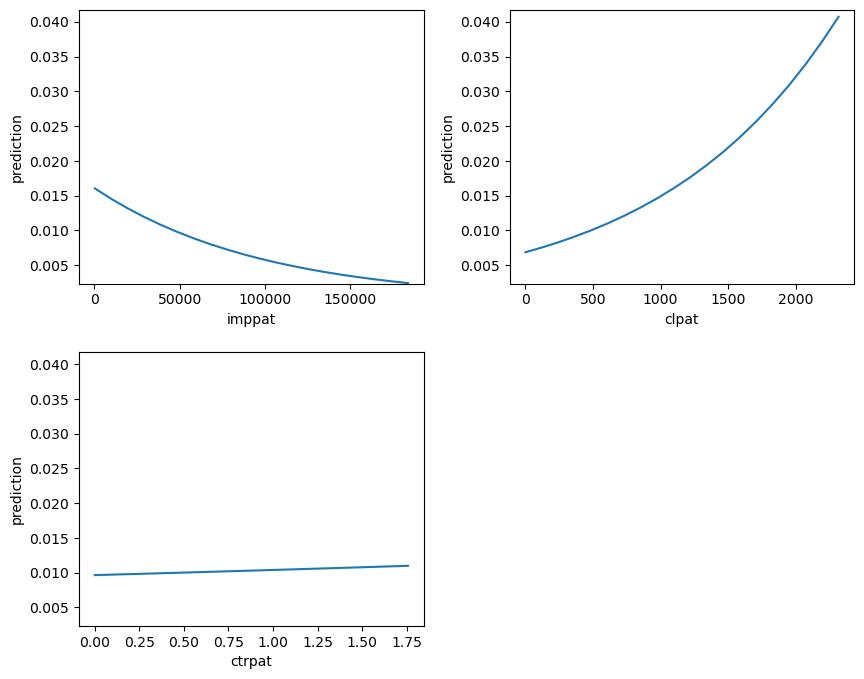

In [181]:
clf_mc3.plot("pred", incl = ["imppat", "clpat", "ctrpat"])

The prediction plots for imppat, clpat, and ctrpat differ in this model because the inclusion of time_fct and app changes how the model attributes click probability to each variable. The changes reflect a more nuanced understanding of the data, where time_fct and app absorb some of the contextual and behavioral patterns, allowing imppat, clpat, and ctrpat to exhibit their true effects. This highlights the importance of carefully selecting explanatory variables to address multicollinearity and capture the full complexity of user behavior.

## Part III: Decile Analysis of Logistic Regression Results (5 points)

> Note: For the following questions, use only the "test" sample of impressions (i.e., 27,953 rows where "training == 'test'")


a. Assign each impression to a decile based on the predicted probability of a click (`pred_logit`) based on the model estimated in I.a. Create a new variable `pred_logit_dec` that captures this information. Note: The first decile should have the highest average click rate. If not, make sure to "reverse" the decile numbers (i.e., 10 becomes 1, 9 becomes 2, etc.). Use the `xtile` function from the `pyrsm` package to create the deciles (2 points)

In [182]:
tz_gaming_test = tz_gaming[tz_gaming['training'] == 'test']
tz_gaming_test.head()

,training,inum,click,time,time_fct,app,mobile_os,impup,clup,ctrup,...,clut,ctrut,imppat,clpat,ctrpat,rnd,pred_vneta,id,pred_logit,pred_rnd
87535,test,I300002,no,21,21,app1,android,1458,3,0.205761,...,0,0.000000,68113,957,1.405018,0.147891,0.003961,id466983,1.020981e-02,0.008791
87536,test,I300006,no,3,3,app40,ios,3,0,0.000000,...,0,0.000000,50,0,0.000000,0.383246,0.018965,id946375,8.665095e-03,0.008718
87537,test,I300012,no,5,5,app12,android,5057,6,0.118647,...,0,0.000000,754,8,1.061008,1.274485,0.003961,id479295,1.910723e-14,0.008448
87538,test,I300015,no,10,10,app1,android,1993,10,0.501756,...,0,0.000000,26537,276,1.040057,0.673022,0.003961,id83284,6.240407e-03,0.008630
87539,test,I300016,no,14,14,app1,ios,212,7,3.301887,...,1,5.263158,57348,874,1.524029,-0.785851,0.050679,id359434,1.233449e-02,0.009086


In [183]:
tz_gaming["pred_logit_dec"] = (tz_gaming_test
    .groupby("training")
    .pred_logit
    .transform(rsm.xtile, 10, rev=True)
)

print(tz_gaming)

       training     inum click  time time_fct    app mobile_os  impup  clup  \
0         train       I7    no     9        9   app8       ios    439     2   
1         train      I23    no    15       15   app1       ios     64     0   
2         train      I28    no    12       12   app5       ios     80     0   
3         train      I30    no    19       19   app1       ios     25     0   
4         train      I35    no    24       24   app1   android   3834    29   
...         ...      ...   ...   ...      ...    ...       ...    ...   ...   
115483     test  I399982    no    21       21   app2       ios   2110     0   
115484     test  I399986    no    17       17  app14   android    291     1   
115485     test  I399991    no    23       23   app1   android    364     3   
115486     test  I399992    no    20       20   app6   android     59     2   
115487     test  I399994    no    18       18   app1       ios    498     7   

           ctrup  ...     ctrut  imppat  clpat    c

b. Report the number of impressions (rows), the number of clicks (`click`), and the click through rate (`ctr`) (i.e., sum of clicks divided by number of impressions) for the TZ ad per decile and save this information to a new dataframe called `dec_tab` (2 points)

In [184]:
# your data frame should have columns called 'nr_impressions', 'nr_clicks', and 'ctr'
# to calculate these values you need deciles, the number of rows (impressions)
# in each decile, the number of clicks in each decile using the `click` variable,
# and the ratio of clicks to impressions (ctr)
dec_tab = (
    tz_gaming[tz_gaming
    ["training"] == "test"]
        .groupby("pred_logit_dec")
        .agg(
            nr_impressions=("pred_logit", "count"),
            nr_clicks=("click", lambda x: (x == "yes").sum()),
            ctr=("click", lambda x: (x == "yes").sum() / len(x))
        )
        .reset_index()
    )

dec_tab

,pred_logit_dec,nr_impressions,nr_clicks,ctr
0,1.0,2796,103,0.036838
1,2.0,2793,48,0.017186
2,3.0,2788,42,0.015065
3,4.0,2796,30,0.010730
4,5.0,2802,15,0.005353
5,6.0,2796,7,0.002504
6,7.0,2794,7,0.002505
7,8.0,2796,3,0.001073
8,9.0,2796,4,0.001431
9,10.0,2796,12,0.004292


c. Create a bar chart of click-through rates per decile (i.e., use `pred_logit_dec` as the x-variable and `ctr` as the y-variable). Note that the "click-through rate" is not the same as the "predicted probability of click." The click-through rate captures the proportion of impressions in a given group (e.g., in a decile) that actually resulted in a click (1 point)

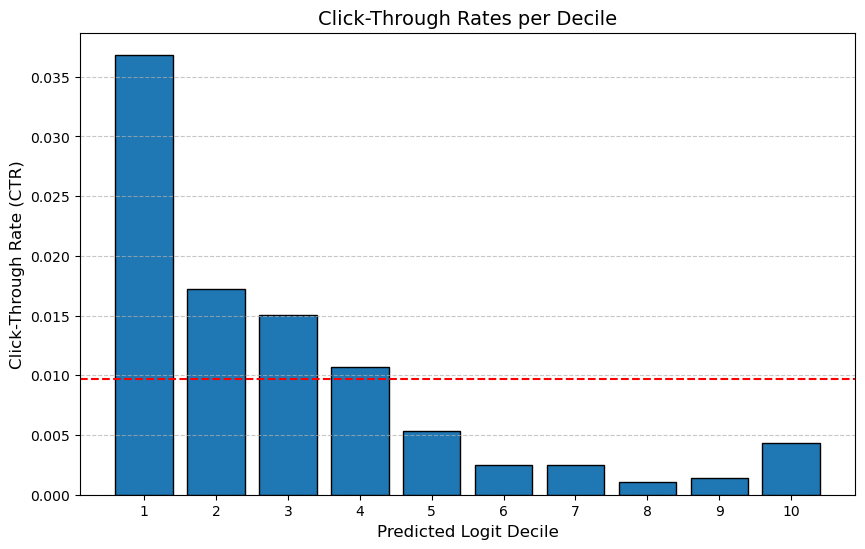

In [185]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(dec_tab["pred_logit_dec"], dec_tab["ctr"], width=0.8, edgecolor="black")
plt.axhline(y=dec_tab["ctr"].mean(), color="red", linestyle="--", label="Mean CTR")

plt.title("Click-Through Rates per Decile", fontsize=14)
plt.xlabel("Predicted Logit Decile", fontsize=12)
plt.ylabel("Click-Through Rate (CTR)", fontsize=12)
plt.xticks(dec_tab["pred_logit_dec"], fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()


## Part IV: Gains Curves (15 points)

Use the `dec_tab` DataFrame you created in Part III for the following calculations.

a. Write python code to generate a table with the cumulative proportion of impressions and the cumulative gains for each decile (8 points)

> Note: Do NOT use any specialized python packages to construct the gains table. Write the python code from scratch. Feel free use ChatGPT or CoPilot, but make sure that it does not use any specialized packages to construct the gains table. Be prepared to discuss the code you submit for this question in class if called upon

In [186]:
dec_tab = dec_tab.sort_values(by="pred_logit_dec", ascending=True)

dec_tab["cum_prop"] = dec_tab["nr_impressions"].cumsum() / dec_tab["nr_impressions"].sum()
dec_tab["cum_gains"] = dec_tab["nr_clicks"].cumsum() / dec_tab["nr_clicks"].sum()

gains_tab = dec_tab[["pred_logit_dec", "nr_impressions", "nr_clicks", "ctr", "cum_prop", "cum_gains"]]
gains_tab

,pred_logit_dec,nr_impressions,nr_clicks,ctr,cum_prop,cum_gains
0,1.0,2796,103,0.036838,0.100025,0.380074
1,2.0,2793,48,0.017186,0.199943,0.557196
2,3.0,2788,42,0.015065,0.299682,0.712177
3,4.0,2796,30,0.010730,0.399707,0.822878
4,5.0,2802,15,0.005353,0.499946,0.878229
5,6.0,2796,7,0.002504,0.599971,0.904059
6,7.0,2794,7,0.002505,0.699925,0.929889
7,8.0,2796,3,0.001073,0.799950,0.940959
8,9.0,2796,4,0.001431,0.899975,0.955720
9,10.0,2796,12,0.004292,1.000000,1.000000


b. Use `seaborn`, `matplotlib`, or `pandas` to create a chart showing the cumulative gains per decile along with a (diagonal) reference line to represent the "no model" scenario. Put cumulative gains on the Y-axis and cumulative proportion of impressions on the X-axis (7 points)

> Note: Do NOT use any specialized packages to construct the gains chart. Write the python code from scratch. Feel free use ChatGPT or CoPilot, but make sure that it does not use any specialized packages to construct the gains chart. Be prepared to discuss the code you submit for this question in class if called upon

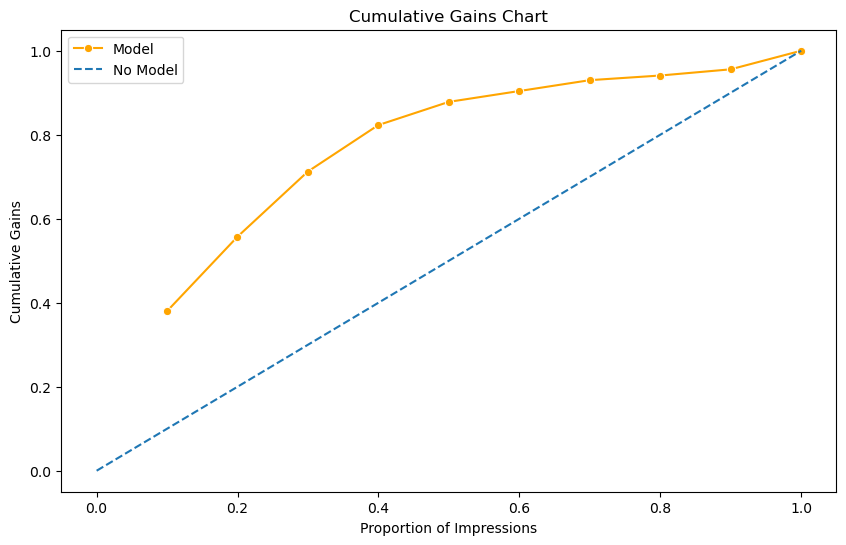

In [187]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='cum_prop', y='cum_gains', data=gains_tab, marker='o', label='Model', color='orange')
plt.plot([0, 1], [0, 1], linestyle='--', label='No Model')

plt.xlabel('Proportion of Impressions')
plt.ylabel('Cumulative Gains')
plt.title('Cumulative Gains Chart')
plt.legend()

plt.show()

In [188]:
profit_tab = pd.DataFrame({"cum_prop": [0] * 10, "cum_profit":[0]*10})

## Part V: Confusion matrix (10 points)

a. Create a "confusion matrix" based on the predictions from the logistic regression model you estimated in Part I.a (i.e., the model used to generate `pred_logit`). Again, use **only** data from the test set here (i.e., "training == 'test'"). Use the financial assumptions mentioned above, and repeated in section VI below, to determine an appropriate cut-off (i.e., breakeven). Calculate "accuracy" based on the confusion matrix you created (2 points)

> Note: Do NOT use any specialized packages to construct the confusion matrix. Code the matrix from scratch.  Feel free use ChatGPT or CoPilot, but make sure that it does not use any specialized packages to construct the confusion matrix. Be prepared to discuss the code you submit for this question in class if called upon

> Note use the code format below to store the relevant values from your confusion matrix

In [189]:
conversion_rate_after_clicking = 5/100
cpm = 10 # Cost per impressions
clv = 25 # Customer lifetime value

expected_revenue_per_click = conversion_rate_after_clicking * clv
print(f"Expected revenue per click: {expected_revenue_per_click:.2f}")
cost_per_impression = cpm/1000
print(f"Cost per impression: {cost_per_impression:.4f}")

breakeven_threshold = cost_per_impression/expected_revenue_per_click
print(f"Breakeven threshold: {breakeven_threshold:.4f}")

# True Positives (TP): Click was "yes" and predicted probability > 0.008
# False Positives (FP): Click was "no" but predicted probability > 0.008
# True Negatives (TN): Click was "no" and predicted probability ≤ 0.008
# False Negatives (FN): Click was "yes" but predicted probability ≤ 0.008

actual = tz_gaming_test["click"].map({"yes": 1, "no": 0})
predicted = (tz_gaming_test["pred_logit"] > breakeven_threshold).astype(int)

#confusion matrix values
TP = ((actual == 1) & (predicted == 1)).sum()
FP = ((actual == 0) & (predicted == 1)).sum()
TN = ((actual == 0) & (predicted == 0)).sum()
FN = ((actual == 1) & (predicted == 0)).sum()

cm_logit = pd.DataFrame(
    {
        "label": ["TP", "FP", "TN", "FN"],
        "nr": [TP, FP, TN, FN]
    }
)

print(cm_logit)

Expected revenue per click: 1.25
Cost per impression: 0.0100
Breakeven threshold: 0.0080
  label     nr
0    TP    221
1    FP  10661
2    TN  17021
3    FN     50


In [190]:
accuracy_logit = (TP + TN) / (TP + FP + TN + FN)
print(f"Accuracy: {accuracy_logit:.4f}")

Accuracy: 0.6168


b. Calculate a confusion matrix based on `pred_rnd` created in Part I.e and calculate "accuracy" based on the confusion matrix you created (2 points)

> Note use the code format below to store the relevant values from your confusion matrix

In [191]:
actual = tz_gaming_test["click"].map({"yes": 1, "no": 0})
predicted = (tz_gaming_test["pred_rnd"] > breakeven_threshold).astype(int)

#confusion matrix values
TP = ((actual == 1) & (predicted == 1)).sum()
FP = ((actual == 0) & (predicted == 1)).sum()
TN = ((actual == 0) & (predicted == 0)).sum()
FN = ((actual == 1) & (predicted == 0)).sum()

cm_rnd = pd.DataFrame(
    {
        "label": ["TP", "FP", "TN", "FN"],
        "nr": [TP, FP, TN, FN]
    }
)

print(cm_rnd)

  label     nr
0    TP    271
1    FP  27606
2    TN     76
3    FN      0


In [192]:
accuracy_rnd = (TP + TN) / (TP + FP + TN + FN)
print(f"Accuracy Rnd: {accuracy_rnd:.4f}")

Accuracy Rnd: 0.0124


c. Discuss the similarities and differences between the two confusion matrices. Which prediction (model) is best, based on the confusion matrix? Provide support for your conclusions (3 points)

Looking at the two confusion matrices, there are some clear differences between the logistic regression model (logit) and the random model (rnd). 

1. True Positives:
    Logit: 221, Rnd: 271

The random model actually found more actual clicks (TPs) than logistic regression.

2. False Positives (i.e., incorrect "click" predictions):
    Logit: 10,661, Rnd: 27,606

This is a huge difference. The random model incorrectly predicted way too many impressions as clicks, which is a problem because it means the model isn't really making useful distinctions but just guessing a lot. Logit, on the other hand, is more conservative, meaning it predicts fewer clicks overall but is also less wrong.

3. True Negatives (correct "no-click" predictions):
    Logit: 17,021, Rnd: 76

This is one of the biggest differences. The logistic regression model correctly identifies a huge number of "no clicks", whereas the random model almost never gets them right.
This makes sense because the random model is just throwing around probabilities randomly, whereas logit is actually learning patterns.

4. False Negatives (missed actual clicks):
    Logit: 50, Rnd: 0

The random model didn't miss any actual clicks, which is good, but it also predicted way too many false clicks (FPs), making it unreliable. The logit model missed 50 actual clicks, but in the bigger picture, it still balances between finding clicks and avoiding false alarms.

Overall Model Performance
    
    Accuracy- Logit: 61.68%, Rnd: 1.24%

This is a massive difference. The logistic regression model is way more reliable at making good classifications. Even though the random model got more true positives, it also predicted an insane number of false positives. Logistic regression is clearly the better choice. It has a much higher accuracy. Even though it misses some actual clicks (FN = 50), it compensates by reducing the false positives significantly compared to the random model. If TZ Gaming is looking for a way to target users efficiently, logistic regression is the better option. The random model is not even close as it predicts way too many false clicks.

d. Recalculate the confusion matrices from V.a and V.b using 0.5 as the cutoff. Based on these new matrices discuss  the similarities and differences. Which model is best based on these new confusion matrices? Provide support for your conclusions (3 points)

> Note use the code format below to store the relevant values from your confusion matrix

In [193]:
#pred_logit

cutoff_breakeven = 0.5

# True Positives (TP): Click was "yes" and predicted probability > 0.5
# False Positives (FP): Click was "no" but predicted probability > 0.5
# True Negatives (TN): Click was "no" and predicted probability ≤ 0.5
# False Negatives (FN): Click was "yes" but predicted probability ≤ 0.5

actual = tz_gaming_test["click"].map({"yes": 1, "no": 0})
predicted = (tz_gaming_test["pred_logit"] > cutoff_breakeven).astype(int)

#confusion matrix values
TP = ((actual == 1) & (predicted == 1)).sum()
FP = ((actual == 0) & (predicted == 1)).sum()
TN = ((actual == 0) & (predicted == 0)).sum()
FN = ((actual == 1) & (predicted == 0)).sum()

cm_logit_recalc = pd.DataFrame(
    {
        "label": ["TP", "FP", "TN", "FN"],
        "nr": [TP, FP, TN, FN]
    }
)

print(cm_logit_recalc)

  label     nr
0    TP      0
1    FP      0
2    TN  27682
3    FN    271


In [194]:
accuracy_logit_recalc = (TP + TN) / (TP + FP + TN + FN)
print(f"{accuracy_logit_recalc = :.4f}")

accuracy_logit_recalc = 0.9903


> Note use the code format below to store the relevant values from your confusion matrix

In [195]:
#pred_rnd

cutoff_breakeven = 0.5

# True Positives (TP): Click was "yes" and predicted probability > 0.5
# False Positives (FP): Click was "no" but predicted probability > 0.5
# True Negatives (TN): Click was "no" and predicted probability ≤ 0.5
# False Negatives (FN): Click was "yes" but predicted probability ≤ 0.5

actual = tz_gaming_test["click"].map({"yes": 1, "no": 0})
predicted = (tz_gaming_test["pred_rnd"] > cutoff_breakeven).astype(int)

#confusion matrix values
TP = ((actual == 1) & (predicted == 1)).sum()
FP = ((actual == 0) & (predicted == 1)).sum()
TN = ((actual == 0) & (predicted == 0)).sum()
FN = ((actual == 1) & (predicted == 0)).sum()

cm_rnd_recalc = pd.DataFrame(
    {
        "label": ["TP", "FP", "TN", "FN"],
        "nr": [TP, FP, TN, FN]
    }
)

print(cm_rnd_recalc)

  label     nr
0    TP      0
1    FP      0
2    TN  27682
3    FN    271


In [196]:
accuracy_rnd_recalc = (TP + TN) / (TP + FP + TN + FN)
print(f"{accuracy_rnd_recalc = :.4f}")

accuracy_rnd_recalc = 0.9903


When we switch to a 0.5 threshold, both models completely fail at predicting clicks. The confusion matrices show that neither the logistic regression model (logit) nor the random model (rnd) classifies any impressions as a click (TP = 0). Instead, all actual clicks are misclassified as false negatives (FN = 271), meaning we miss every potential customer who would have clicked. At the same time, false positives (FP) drop to zero, and almost every impression is correctly labeled as a no-click (TN = 27,682), which inflates the accuracy to 99.03 %. However, this high accuracy is misleading because the model is simply playing it safe by predicting "no-click" for everything. This makes it useless for ad targeting, as the entire goal of the model is to identify users who are likely to click and not just maximize accuracy by avoiding false positives.

Comparing this to the breakeven threshold (0.008) from earlier, the logistic regression model was much better at balancing true positives and false positives. The 0.5 threshold is just too high for a scenario where click probabilities are naturally low. Logistic regression with the breakeven threshold remains the best choice, as it provides a meaningful way to separate potential clickers from non-clickers while keeping false positives under control.

But, as we know the models predict the true negatives almost perfectly, hence if it shows true negative, we can do the opposite of what the model says. Since both models almost perfectly predict true negatives (TN), we could flip the approach and target the users the model thinks won’t click instead of the ones it predicts will click. If the model is overly conservative with a 0.5 threshold, predicting "no-click" for nearly everyone, that might actually mean there are valuable prospects hidden within the false negatives.

## Part VI: Model comparison (12 points)


Use the following cost information to assess the profitability each of these models for targeting purposes during the upcoming 20-million impression advertising campaign:

* Cost per 1,000 video impressions (CPM) is $10
* Conversion to sign-up as a TZ game player after clicking on an ad is 5%
* The expected CLV of customers that sign-up with TZ after clicking on an ad is approximately $25
* The total cost of the data from Vneta is $50K
* The total cost charged for the data science consulting services by Vneta is $150K

Use `pred_logit`, `pred_rnd`, and the predictions from Vneta based on their proprietary model `pred_vneta` to compare model performance.

> Note: The currently available data (+ the `pred_vneta` prediction) are free of charge as part of the partnership between Vneta and TZ-gaming

a. Create a new variable `target_logit` that is `True` if the predicted click-through (`pred_logit`) probability is greater than the break-even response rate and `FALSE` otherwise (1 point)

In [197]:
# as we know that break even threshhold is 0.008

tz_gaming["target_logit"] = tz_gaming["pred_logit"] > breakeven_threshold
print(tz_gaming[["pred_logit", "target_logit"]].head())

     pred_logit  target_logit
0  3.382977e-13         False
1  1.156355e-02          True
2  2.655311e-03         False
3  1.349420e-02          True
4  1.868222e-03         False


b. Create a new variable `target_rnd` that is `True` if the predicted click-through (`pred_rnd`) probability is greater than the break-even response rate and `FALSE` otherwise (1 point)

In [198]:
tz_gaming["target_rnd"] = tz_gaming["pred_rnd"] > breakeven_threshold
print(tz_gaming[["pred_rnd", "target_rnd"]].head())

   pred_rnd  target_rnd
0  0.009222        True
1  0.008751        True
2  0.008505        True
3  0.009600        True
4  0.008704        True


c. Create a new variable `target_vneta` that is `True` if the predicted click-through (`pred_vneta`) probability is greater than the break-even response rate and `False` otherwise (1 point)

In [199]:
# insert your answer here
tz_gaming["target_vneta"] = tz_gaming["pred_vneta"] > breakeven_threshold
print(tz_gaming[["pred_vneta", "target_vneta"]].head())

   pred_vneta  target_vneta
0    0.003961         False
1    0.003961         False
2    0.003961         False
3    0.018965          True
4    0.003961         False


d. Based on the performance in the test set (i.e, `training == 'test'`), calculate the **projected** expected profit (in dollars) and the expected return on marketing expenditures (ROME) for the upcoming campaign if TZ (1) "spams" everyone, (2) continues to target using their current approach (i.e., use `pred_rnd`), (3) uses the data from Vneta to build the logistic regression from section I (i.e., use `pred_logit`) for targeting, or (4) used Vneta's data science consulting services (i.e., use `pred_vneta`) to **select the best prospects out of 20M impressions**. (3 points)

> Note: Calculate the total **projected profits from selecting the best prospects out of 20M impressions** under the assumption that options (3) and (4) are free of charge. Then compare the profit numbers to determine if these options would be worth the expense going forward.

> Note: Calculate total profits under the assumption that options (3) and (4) are free of charge. Then compare the profit numbers to determine if these options would be worth the expense going forward.

In [200]:
total_impressions = 20000000 
cpm = 10  # Cost per 1,000 impressions
cost_per_click = cpm / 1000  # $0.01 per impression
conversion_rate = 0.05 
clv = 25  # customer lifetime Value


In [201]:
breakeven_threshold

0.008

In [202]:
tz_gaming["pred_spam"] = 1
tz_gaming["target_spam"] = True

n = len(tz_gaming_test) 
cost = n / 1000 * cpm
yes_click = tz_gaming_test[tz_gaming_test['click'] == 'yes'].shape[0]
response_rate = yes_click / n
respondes = n * response_rate
signups = respondes * conversion_rate
revenue = signups * clv

spam_profit = revenue - cost
spam_ROME = spam_profit / cost

print(f"Expected Profit when spamming: ${spam_profit:.2f}")
print(f"Return on Marketing Expenditure (ROME) when spamming: {spam_ROME:.2%}")

Expected Profit when spamming: $59.22
Return on Marketing Expenditure (ROME) when spamming: 21.19%


In [203]:
tz_gaming_test["target_logit"] = tz_gaming_test["pred_logit"] > breakeven_threshold
tz_logit_targeted = tz_gaming_test[tz_gaming_test["target_logit"]]

n_logit = len(tz_logit_targeted)
cost_logit = n_logit / 1000 * cpm
clicks_logit = tz_logit_targeted[tz_logit_targeted['click'] == 'yes'].shape[0]
response_rate_logit = clicks_logit / n_logit
responses_logit = n_logit * response_rate_logit
signups_logit = responses_logit * conversion_rate
revenue_logit = signups_logit * clv

logit_profit = revenue_logit - cost_logit
logit_ROME = logit_profit / cost_logit

print(f"Logit Expected Profit: ${logit_profit:.2f}")
print(f"Logit Return on Marketing Expenditure (ROME): {logit_ROME:.2%}")

Logit Expected Profit: $167.43
Logit Return on Marketing Expenditure (ROME): 153.86%


/tmp/ipykernel_5259/3722800258.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tz_gaming_test["target_logit"] = tz_gaming_test["pred_logit"] > breakeven_threshold


In [204]:
tz_gaming_test["target_rnd"] = tz_gaming_test["pred_rnd"] > breakeven_threshold
tz_rnd_targeted = tz_gaming_test[tz_gaming_test["target_rnd"]]

n_rnd = len(tz_rnd_targeted)
cost_rnd = n_rnd / 1000 * cpm
true_clicks_rnd = tz_rnd_targeted[tz_rnd_targeted['click'] == 'yes'].shape[0]
response_rate_rnd = true_clicks_rnd / n_rnd
responses_rnd = n_rnd * response_rate_rnd
signups_rnd = responses_rnd * conversion_rate
revenue_rnd = signups_rnd * clv

rnd_profit = revenue_rnd - cost_rnd
rnd_ROME = rnd_profit / cost_rnd

print(f"Rnd Expected Profit: ${rnd_profit:.2f}")
print(f"Rnd Return on Marketing Expenditure (ROME): {rnd_ROME:.2%}")

Rnd Expected Profit: $59.98
Rnd Return on Marketing Expenditure (ROME): 21.52%


/tmp/ipykernel_5259/2757257343.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tz_gaming_test["target_rnd"] = tz_gaming_test["pred_rnd"] > breakeven_threshold


In [205]:
tz_gaming_test["target_vneta"] = tz_gaming_test["pred_vneta"] > breakeven_threshold
tz_vneta_targeted = tz_gaming_test[tz_gaming_test["target_vneta"]]

n_vneta = len(tz_vneta_targeted)
cost_vneta = n_vneta / 1000 * cpm
true_clicks_vneta = tz_vneta_targeted[tz_vneta_targeted['click'] == 'yes'].shape[0]
response_rate_vneta = true_clicks_vneta / n_vneta
respondes_vneta = n_vneta * response_rate_vneta
signups_vneta = respondes_vneta * 0.05
revenue_vneta = signups_vneta * 25

vneta_profit = revenue_vneta - cost_vneta
vneta_ROME = vneta_profit / cost_vneta

print(f"Vneta Expected Profit: ${vneta_profit:.2f}")
print(f"Vneta Return on Marketing Expenditure (ROME): {vneta_ROME:.2%}")

Vneta Expected Profit: $151.29
Vneta Return on Marketing Expenditure (ROME): 310.59%


/tmp/ipykernel_5259/1363437856.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tz_gaming_test["target_vneta"] = tz_gaming_test["pred_vneta"] > breakeven_threshold


In [206]:
tz_gaming["pred_spam"] = 1
tz_gaming["target_spam"] = True

mod_perf = pd.DataFrame(
    {
        "model": [
            "logit",
            "rnd",
            "vneta",
            "spam",
        ],
        "profit": [logit_profit, rnd_profit, vneta_profit, spam_profit],
        "ROME": [logit_ROME, rnd_ROME, vneta_ROME, spam_ROME]
    }
)

mod_perf

,model,profit,ROME
0,logit,167.43,1.538596
1,rnd,59.98,0.215159
2,vneta,151.29,3.105933
3,spam,59.22,0.211856


e. Based on the projected profit numbers from VI.d, discuss which of these 4 approaches you would recommend and why (2 points)

1. Spam (Targeting Everyone in the Test Set):

Profit: $59.22 ROME: 21.19% Analysis: This approach is easy to implement but lacks precision, leading to a lower return on investment. While it ensures broad exposure, the inefficiency in targeting results in suboptimal profitability.

2. Rnd (Current Targeting Approach):

Profit: $59.98 ROME: 21.52% Analysis: This method performs slightly better than spamming everyone, indicating some level of effectiveness in the existing targeting strategy. However, the small improvement suggests that the current approach is not highly optimized and could be refined further.

3. Logit (Purchasing Vneta Data and Using Logistic Regression for Targeting):

Profit: $167.43 ROME: 153.86% Analysis: This model significantly outperforms the first two approaches in both profitability and return on investment. The logistic regression model is more effective in identifying users likely to engage with the ads, making it a much more efficient targeting strategy.

4. Vneta (Using Vneta's Data Science Consulting Services):

Profit: $151.29 ROME: 310.59% Analysis: While this approach generates slightly less profit than the Logit model, it achieves the highest return on marketing expenditure (ROME), making it the most efficient in terms of investment-to-profit ratio.

Recommendation:

Both the Logit model and Vneta’s consulting services are strong choices, depending on TZ Gaming’s priorities. If the goal is to maximize revenue, the Logit model is preferable, as it delivers the highest profit. However, if cost-efficiency and return on investment are more important, the Vneta model is the better option due to its superior ROME. If TZ Gaming have a larger budget and aim for maximum revenue, the Logit model is the best fit. On the other hand, if they are working with a tighter budget and need to optimize efficiency, the Vneta model would be a smarter choice.

f. Calculate the profit and ROME implications for each of the 4 options mentioned in VI.d if TZ purchases exactly 20-million impressions for the upcoming ad campaign out of the +500M prospects that Vneta has access to (2 points)

> Note: Calculate **projected profits from purchasing exactly 20M impressions** under the assumption that options (3) and (4) are free of charge. Then compare the profit numbers to determine if these options would be worth the expense going forward.

> Note: For efficiency, consider adapting the `perf_calc` function you created for the Tuango case to do the relevant performance calculations for the different models.

In [207]:
total_spam = total_impressions 

cost_spam_20M = total_spam * (cpm / 1000)
click_true_spam_20M = tz_gaming_test[tz_gaming_test["click"] == "yes"]

response_rate_spam_20M = click_true_spam_20M["click"].count() / len(tz_gaming_test)
responses_spam_20M = total_spam * response_rate_spam_20M

registrations_spam_20M = responses_spam_20M * 0.05
revenue_spam_20M = registrations_spam_20M * 25

profit_spam_20M = revenue_spam_20M - cost_spam_20M
ROME_spam_20M = profit_spam_20M / cost_spam_20M

print(profit_spam_20M, ROME_spam_20M)

42371.122956391075 0.2118556147819554


In [208]:
total_logit_impressions = total_impressions * (tz_gaming_test["target_logit"].sum() / len(tz_gaming_test))

cost_logit_20M = total_logit_impressions * (cpm / 1000)
true_clicks_logit_20M = tz_gaming_test[(tz_gaming_test["click"] == "yes") & (tz_gaming_test["target_logit"] == True)]

response_rate_logit_20M = true_clicks_logit_20M["click"].count() / tz_gaming_test["target_logit"].sum()
responses_logit_20M = total_logit_impressions * response_rate_logit_20M

registrations_logit_20M = responses_logit_20M * conversion_rate
revenue_logit_20M = registrations_logit_20M * clv

profit_logit_20M = revenue_logit_20M - cost_logit_20M
ROME_logit_20M = profit_logit_20M / cost_logit_20M

print(profit_logit_20M, ROME_logit_20M)

119793.93982756774 1.5385958463517742


In [209]:
total_rnd = total_impressions * (tz_gaming_test["target_rnd"].sum() / len(tz_gaming_test))

cost_rnd_20M = total_rnd * (cpm / 1000)
click_true_rnd_20M = tz_gaming_test[(tz_gaming_test["click"] == "yes") & (tz_gaming_test["target_rnd"] == True)]

response_rate_rnd_20M = click_true_rnd_20M["click"].count() / tz_gaming_test["target_rnd"].sum()
responses_rnd_20M = total_rnd * response_rate_rnd_20M

registrations_rnd_20M = responses_rnd_20M * 0.05
revenue_rnd_20M = registrations_rnd_20M * 25

profit_rnd_20M = revenue_rnd_20M - cost_rnd_20M
ROME_rnd_20M = profit_rnd_20M / cost_rnd_20M

print(profit_rnd_20M, ROME_rnd_20M)

42914.89285586518 0.21515945044301743


In [210]:
total_vneta = total_impressions * (tz_gaming_test["target_vneta"].sum() / len(tz_gaming_test))

cost_vneta_20M = total_vneta * (cpm / 1000)
click_true_vneta_20M = tz_gaming_test[(tz_gaming_test["click"] == "yes") & (tz_gaming_test["target_vneta"] == True)]

response_rate_vneta_20M = click_true_vneta_20M["click"].count() / tz_gaming_test["target_vneta"].sum()
responses_vneta_20M = total_vneta * response_rate_vneta_20M

registrations_vneta_20M = responses_vneta_20M * 0.05
revenue_vneta_20M = registrations_vneta_20M * 25

profit_vneta_20M = revenue_vneta_20M - cost_vneta_20M
ROME_vneta_20M = profit_vneta_20M / cost_vneta_20M

print(profit_vneta_20M, ROME_vneta_20M)

108245.98433084103 3.1059330732909047


In [211]:
mod_perf_20M = pd.DataFrame(
    {
        "model": [
            "logit",
            "rnd",
            "vneta",
            "spam",
        ],
        "profit": [profit_logit_20M, profit_rnd_20M, profit_vneta_20M, profit_spam_20M],
        "ROME": [ROME_logit_20M, ROME_rnd_20M, ROME_vneta_20M, ROME_spam_20M]
    }
)

mod_perf_20M

,model,profit,ROME
0,logit,119793.939828,1.538596
1,rnd,42914.892856,0.215159
2,vneta,108245.984331,3.105933
3,spam,42371.122956,0.211856


g. Based on the results from VI.f, discuss which of the 4 approaches you would recommend to put into production and why. Is your recommendation different from VI.e? Why (not) (2 points)

1. Logit Model:
Profit: $119,793.94, ROME: 153.86%

The Logit model delivers the highest profit among all approaches while maintaining a strong return on marketing expenditure. This highlights its ability to generate significant returns, making it a highly effective and profitable choice.

2. Rnd Model:
Profit: $42,914.89, ROME: 21.52%

Although it performs better than the spam strategy, the Rnd model lags significantly behind the Logit and Vneta models in both profitability and return on investment, indicating room for improvement in its targeting efficiency.

3. Vneta Model:
Profit: $108,245.98, ROME: 310.59%

The Vneta model stands out for its exceptional return on marketing expenditure, making it the most cost-efficient approach. While its total profit is slightly lower than that of the Logit model, its ability to maximize returns relative to investment is impressive.

4. Spam Model:
Profit: $42,371.12, ROME: 21.19%

The spam method results in the lowest profit and ROME, reinforcing its inefficiency in utilizing ad impressions effectively. This approach lacks strategic targeting, leading to wasted ad spend.

Recommendation:
For the upcoming ad campaign, the Logit model is the most favorable option due to its highest profit, which is critical for maximizing revenue. However, if efficiency and return on investment are the primary concerns, the Vneta model is a compelling alternative, as it achieves the best ROME.

Comparison with Part VI e:
This recommendation is consistent with the earlier findings in VI.e, where both the Logit and Vneta models were highlighted as the top choices. The results from the 20-million impression campaign further validate that these two models are the most financially viable and efficient.

## Part VII: Generative AI (5 points)

Please describe how you used Generative AI-tools like ChatGPT to support your work on this assignment and enhance your learning. Create a pdf where you organize your interactions with AI and comment on what things did and did not go well. Bring any questions you may have about the assignment and the support you received from GenAI to class so we can discuss.

Make sure to include:

- Specific examples of prompts you used
- How the AI responses helped or hindered your understanding
- Any limitations or challenges you encountered
- Key insights gained from using GenAI tools
- Questions that arose during your interactions with AI
- How GenAI complemented your learning process

Note: No matter how you used Generative AI-tools, you will be expected to understand and talk meaningfully about the work you submitted for this assignment. You may be called on in class to walk us through your thought process and calculations.